<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/Week%205/MIS701_Lab_5_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MIS710 Lecture 5**

**Introduction to Decision Tree and KNN **
Author: Associate Professor Lemai Nguyen

Objective:
**Predict golf playing**
Predict if a play will likely to play golf based on weather conditions.

**Context**: To help a golf club needs to predict if a golfer comes to play based on their play history and weather conditions. 

**Data**: 
Outlook = The outlook of the weather

Temperature = The temperature of the weather

Humidity = The humidity of the weather

Windy = A variable if it is windy that day or not

Play = The label, if the golfer played golf that day or not

**Source**: Kotu and Deshpande, 2019, chapter 4

**Loading Libraries and Functions**

Read about Logistic Regression at:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Train Test Split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

Classification metrics:
https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np
 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

# **Exercise 1: Biopsy**

Let's try another dataset we are familiar with from Week 4

## **Loading data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/biopsy_ln.csv'

In [ ]:
# load dataset
#records = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/biopsy_ln.csv")
records = pd.read_csv('https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/biopsy_ln.csv')


## **Inspecting and preparing data**

In [ ]:
#explore the dataset
print(records)

     V1  V2  V7  V8  V9 diagnosis
0     8   3   1   6   2   healthy
1    10   2   1   1   2   healthy
2     9   5   2   1   5   healthy
3     9   6   2   9  10   healthy
4     2   3   2   5   1   healthy
..   ..  ..  ..  ..  ..       ...
694   1   3   7   2   1   healthy
695   2   2   7   1   1   healthy
696   3   1   7   1   1   healthy
697   8   4   7   8   2   healthy
698   4   4   7   3   1   healthy

[699 rows x 6 columns]


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   V1         699 non-null    int64 
 1   V2         699 non-null    int64 
 2   V7         699 non-null    int64 
 3   V8         699 non-null    int64 
 4   V9         699 non-null    int64 
 5   diagnosis  699 non-null    object
dtypes: int64(5), object(1)
memory usage: 32.9+ KB


In [ ]:
#Inspect missing data
records.isnull().sum()

ID           0
V1           0
V2           0
V7           0
V8           0
V9           0
diagnosis    0
dtype: int64

In [ ]:
#drop irrelevant variables
records=records.drop(['ID'], axis=1)

In [ ]:
#convert categorical data to numerical 
def coding_diagnosis(x):
        if x=='cancerous': return 1
        if x=='healthy': return 0
       
records['Diagnosis'] = records['diagnosis'].apply(coding_diagnosis)

print(records.sample(10))

     V1  V2  V7  V8  V9  diagnosis  Diagnosis
398   3   1   2   1   1    healthy          0
46    7   4   4   3   1  cancerous          1
386   1   1   1   1   8    healthy          0
453   1   1   2   1   1    healthy          0
584   1   1   3   1   1    healthy          0
80    8   2   5   4   4  cancerous          1
24   10   8   3   1  10    healthy          0
234   5  10  10   1   1  cancerous          1
229   9  10  10  10  10  cancerous          1
146   6  10   7   3   3  cancerous          1


In [ ]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   V1         699 non-null    int64 
 1   V2         699 non-null    int64 
 2   V7         699 non-null    int64 
 3   V8         699 non-null    int64 
 4   V9         699 non-null    int64 
 5   diagnosis  699 non-null    object
 6   Diagnosis  699 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 38.4+ KB


### **Visually Exploring Data**
1. Explore histograms of continuous variables
2. Generate barcharts of categorical variables
3. Convert data as needed
3. Explore relationships among the variables using heatmaps
4. Explore logistric regression relationships between variables 

In [ ]:
#create histograms
for i in records.iloc[:,:6]: 
    plt.hist(records[i])
    plt.title(i)
    plt.show()

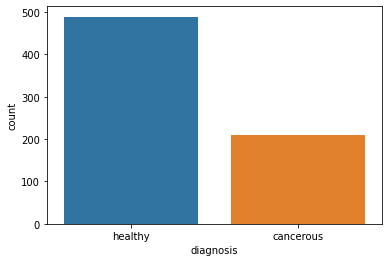

In [ ]:
#create barchats
plot=sns.countplot(data=records, x='diagnosis')
plt.show()

In [ ]:
#create barchats
plot=sns.countplot(data=records, x='Diagnosis')


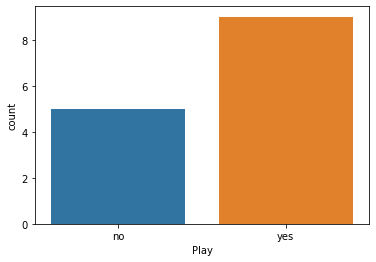

In [ ]:
from pandas.io.parsers.readers import annotations
    #create barchats
plot=sns.countplot(data=records, x='Play')
plt.show()

<Axes: >

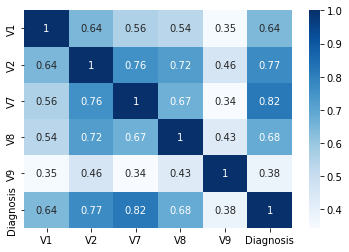

In [ ]:
sns.heatmap(data=records.corr(), cmap="Blues", annot=True)

In [ ]:
sns.regplot(x=records['V2'], y=records['Diagnosis'], logistic=True, ci=None)

In [ ]:
for i in records.iloc[:,0:5]: 
  sns.regplot(x=records[i], y=records['Diagnosis'], logistic=True, ci=None)
  plt.title(i)
  plt.show()

## **Selection Features and Label**

Select predictors (attributes) for Classification
Set role (Target)

In [ ]:
#Selecting predictors and label
features = records.columns[0:5]
X=records[features]  #Input data
y=records['Diagnosis'] # Target variable

In [ ]:
y.head()

In [ ]:
X.head()

,V1,V2,V7,V8,V9
0,8,3,1,6,2
1,10,2,1,1,2
2,9,5,2,1,5
3,9,6,2,9,10
4,2,3,2,5,1


## **Splitting the Dataset**

Split arrays or matrices into random train and test subsets
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])


     V1  V2  V7  V8  V9
463   5   3   2   1   1
198   5   8   8  10   3
306   3   1   1   1   1
337   3   1   1   1   1
126   8   2   7   1   1
463    0
198    1
306    0
337    0
126    1
Name: Diagnosis, dtype: int64
Training dataset size: 559
Test dataset size: 140


## **Training and Applying a Decision Tree Classifier**

Train a model using the training dataset
Make prediction using the model for the test dataset
Read about DecisionTreeClassifier at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html



In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #default criterion is gini, max_depth=25

# Train Decision Tree Classifer with the traning dataset 
clf = clf.fit(X_train, y_train)

#Make predictions for the test dataset
y_pred = clf.predict(X_test)


**Inspect Predictions**

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

,V1,V2,V7,V8,V9,Actual,Predicted
376,5,3,1,1,1,0,0
15,9,10,3,3,1,0,0
297,1,1,1,1,1,0,0
208,5,10,8,5,1,1,1
354,5,1,1,1,1,0,0
658,4,1,3,1,1,0,0
682,4,6,4,9,1,0,1
319,5,1,1,1,1,0,0
98,10,4,5,3,1,1,1
527,5,1,2,1,1,0,0


## **Evaluating the model**



1.   Calculate Accuracy, Precision, Recall, F1


Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics







In [ ]:
#Model Evaluation, calculate metrics: Accuracy, Precision, Recall, F1,
print("Accuracy: ", '%.3f' % metrics.accuracy_score(y_test,y_pred))
print("Precision: ",'%.3f' % metrics.precision_score(y_test,y_pred))
print("Recall: ", '%.3f' % metrics.recall_score(y_test,y_pred))
print("F1: ", '%.3f' % metrics.f1_score(y_test,y_pred))


Accuracy:  0.950
Precision:  0.907
Recall:  0.929
F1:  0.918


In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96  2]
 [ 5 37]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        98
           1       0.95      0.88      0.91        42

    accuracy                           0.95       140
   macro avg       0.95      0.93      0.94       140
weighted avg       0.95      0.95      0.95       140



### **Plot ROC (Receiver operating characteristic) curve and confusion matrix**

ROC surve
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc_curve#sklearn.metrics.plot_roc_curve

Confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=plot%20confusion%20matrix#sklearn.metrics.plot_confusion_matrix

In [ ]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]
y_pred_probs

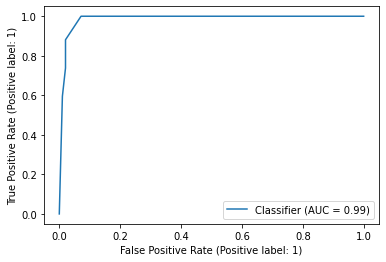

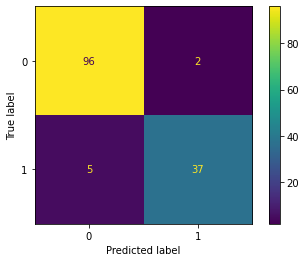

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_probs)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### **Visualising the trees**

In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

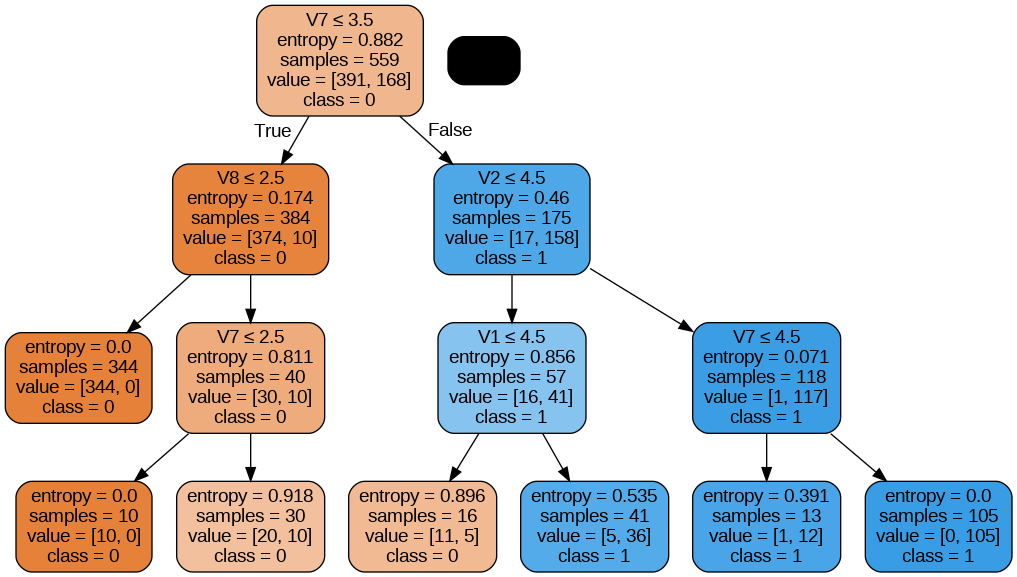

In [ ]:
#Import libraries and classes
from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Biopsy.png')
Image(graph.create_png())

# **Exercise 2: Titanic**


## **Loading data**

In [ ]:
url='https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/titanic_train.csv'

# write your own code to load the dataset with the above address. Hint: use pd.read_csv


## **Inspecting and handling missing data and incorrectly recorded data**

In [ ]:
records.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
records.info()

In [ ]:
#drop irrelevant variables, hint use the drop function drop([.....], axis=1)


In [ ]:
#Check missing data


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
records.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## **Exploratory data analysis**
Undertake an exploratory data analysis with descritive stats and visualisaiton of data by yourself

In [ ]:
#write code to examine descriptive statistics for each variable at a time

In [ ]:
records.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Age'>

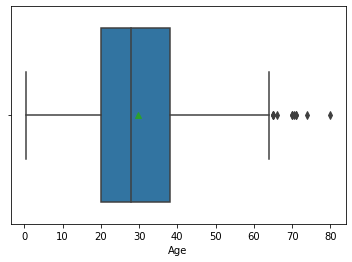

In [ ]:
#Visualise data, for example
sns.boxplot(data=records, x='Age', showmeans=True)

<Axes: xlabel='Survived', ylabel='count'>

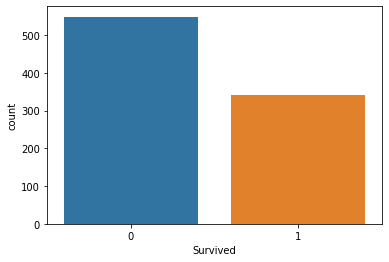

In [ ]:
sns.countplot(data=records, x='Survived')

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


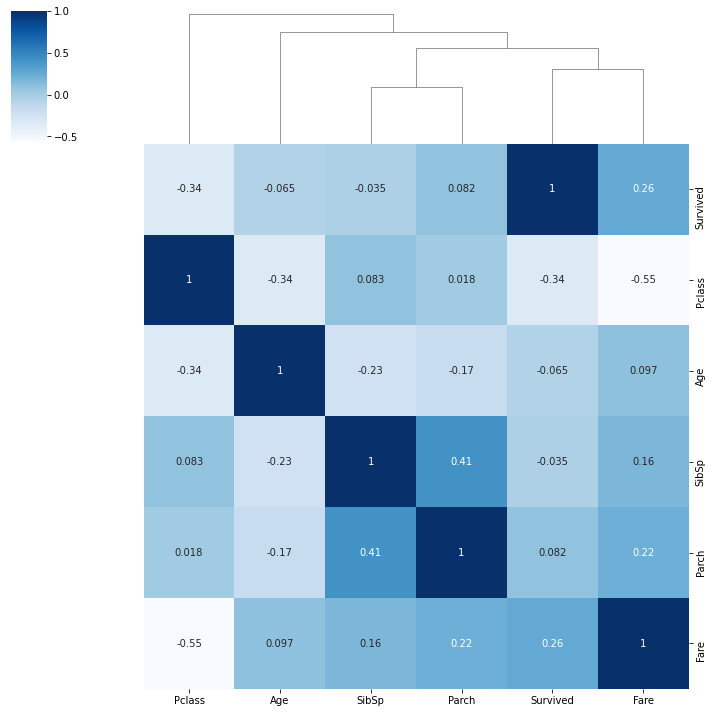

In [ ]:
#generate dendrograms to show hierarchical clustering  


In [ ]:
#Fill in missing numerical data with mean and categorical data with mode
records['Age'].fillna(records['Age'].mean(),inplace=True)
records['Embarked'].fillna(records['Embarked'].mode()[0], inplace=True) #there can be more than one mode

In [ ]:
cat_columns=['Sex','Embarked']
#Convert categorical variables to numerical using get dummies
records=pd.get_dummies(records, columns=cat_columns, drop_first=True)

print(records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB
None


## **Selecting Features and Label**
Select predictors (attributes) for Classification Set role (Target)

In [ ]:
#Select predictors
#features=
X=records[features]

In [ ]:
y=records['Survived']

## **Splitting the Dataset**
Split arrays or matrices into random train and test subsets https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)  # 80% training and 20% testing 

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape[0])
print('Test dataset size:',X_test.shape[0])

      Age  Sex_male  Pclass     Fare  SibSp  Parch  Embarked_Q  Embarked_S
368  28.0         0       3    7.750      0      0           1           0
542  11.0         0       3   31.275      4      2           0           1
49   18.0         0       3   17.800      1      0           0           1
667  28.0         1       3    7.775      0      0           0           1
297   2.0         0       1  151.550      1      2           0           1
368    1
542    0
49     0
667    0
297    0
Name: Survived, dtype: int64
Training dataset size: 712
Test dataset size: 179


## **Training and Applying a Decision Tree Classifier**
Train a model using the training dataset Make prediction using the model for the test dataset Read about DecisionTreeClassifier at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Create Decision Tree classifer object


# Train Decision Tree Classifer with the traning dataset 


#Make predictions for the test dataset




### **Inspect Predictions**

In [ ]:
#join unseen y_test with predicted value into a data frame
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

#join X_test with the new dataframe
inspection=pd.concat([X_test,inspection], axis=1)

inspection.sample(20)

## **Evaluating the model**
Calculate Accuracy, Precision, Recall, F1
Classification metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [ ]:
#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[95 15]
 [22 47]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
#get predicted probabilities for the main class
y_pred_probs = clf.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]


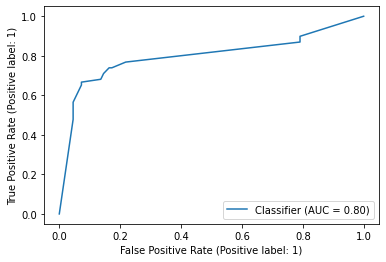

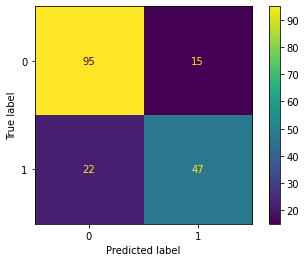

In [ ]:
#write code to display the ROC and Confusion matrix

plt.show()

<Axes: >

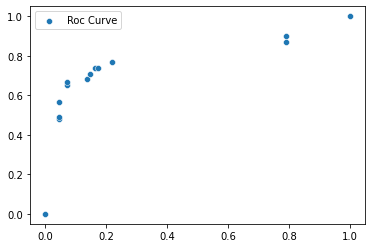

In [ ]:
#get fpr and tpr and plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_pred_probs)

sns.scatterplot(x=lr_fpr, y=lr_tpr, label='Roc Curve')

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc = roc_auc_score(y_test, y_pred_probs)

# Find best threshold
optimal_idx = (tpr - fpr).argmax()
best_threshold = thresholds[optimal_idx]

print('Best thredshold', best_threshold)
print('AUC:', auc)

Best thredshold 0.8
AUC: 0.7982872200263504


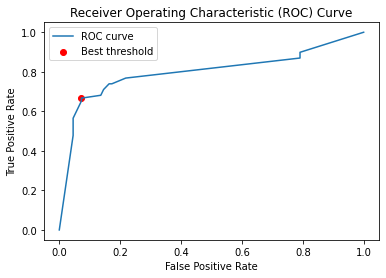

In [ ]:
# plot the ROC curve and the best point
plt.plot(lr_fpr, lr_tpr, label='ROC curve')
plt.scatter(lr_fpr[best_index], lr_tpr[best_index], marker='o', color='red', label='Best threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Exercise 3: House Price**
Let's try another dataset we are familiar with from Week 3

## **Loading data**

In [ ]:
# load dataset
records = pd.read_csv('https://raw.githubusercontent.com/VanLan0/MIS710-ML/main/Datasets/Housing3.csv')

#explore the dataset
print(records)

print('Sample size:', records.shape[0])
print('Number of columns:', records.shape[1]) 

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0                no             yes        2      yes        furnished   

## **Inspecting and handling missing data and incorrectly recorded data**

In [ ]:
#write code to display the following

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              536 non-null    object
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          539 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  538 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 55.5+ KB


In [ ]:
#area is wrongly documented as string
records['area'] = records['area'].apply(pd.to_numeric, errors='coerce')

In [ ]:
#write code to inspect missing data

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [ ]:
#Fill in missing numerical data with mean and categorical data with mode
records['area'].fillna(records['area'].mean(),inplace=True)
records['furnishingstatus'].fillna(records['furnishingstatus'].mode()[0], inplace=True) #there can be more than one mode

#handle missing mainroad data

In [ ]:
#Last week, we learned to convert categorical variables to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
#for example:
records['mainroad_N'] = encoder.fit_transform(records['mainroad', 'basement',)
records['basement_N'] = encoder.fit_transform(records['basement'])

#encode other variables as needed

## **Exploratory data analysis**

/usr/local/lib/python3.9/dist-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


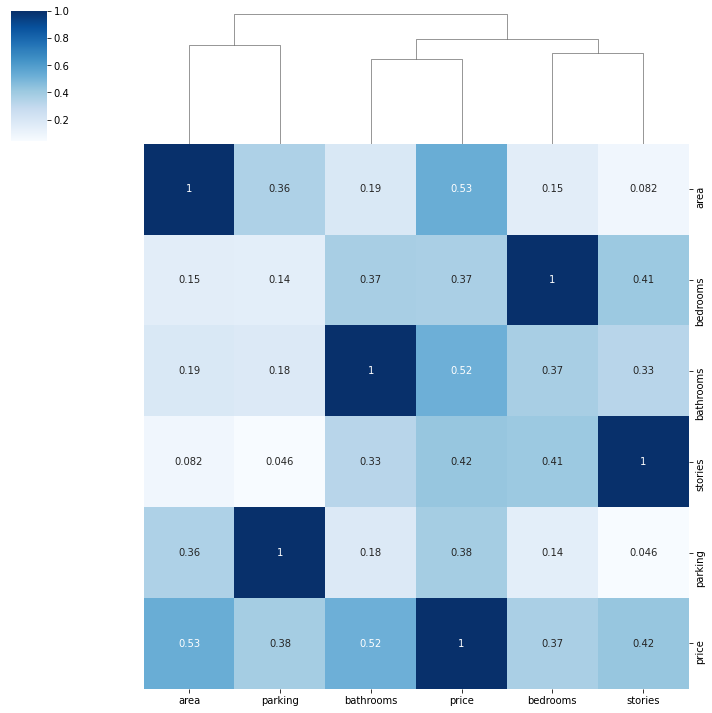

In [ ]:
#explore data yourself

#for example, generate dendrograms to show hierarchical clustering  
sns.clustermap(records.corr(), square=True, cmap='Blues', annot=True, row_cluster=False)

## **Selection Features and Label**
Select predictors (attributes) for Classification Set role (Target)

In [ ]:
#Select predictors
#features=['area','bedrooms', ....]
X=records[features]


In [ ]:
#specify the label
y=records['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

## **Splitting the Dataset**
Split arrays or matrices into random train and test subsets https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

In [ ]:
#from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 70% and test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing 

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


       area  bedrooms  bathrooms  stories  parking  mainroad  guestroom  \
180  4500.0         4          2        1        2         0          0   
189  3540.0         2          1        1        0         0          1   
93   7200.0         3          2        1        3         1          0   
444  3120.0         3          1        2        0         0          0   
81   4000.0         3          2        2        1         1          0   

     basement  hotwaterheating  airconditioning  prefarea  furnishingstatus  
180         2                0                2         1                 2  
189         2                0                1         1                 2  
93          2                0                2         1                 2  
444         1                0                1         1                 1  
81          2                0                2         1                 2  
180    5215000
189    5040000
93     6300000
444    3220000
81     6615000
Name: 

## **Training a Decision Tree Regressor**
Train a model using the training dataset Make prediction using the model for the test dataset Read about DecisionTreeRegressor at: 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor

In [ ]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#instantiate a decision tree regressor and fit it with the training data
regressor = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

#write code to train the regressor



DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

## **Applying the Decision Tree Regressor on the testset**

In [ ]:
#predict prices



## **Evaluating the model performance**


In [ ]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.0f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', '%.0f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', '%.0f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1075974
Mean Squared Error: 2328073543008
Root Mean Squared Error: 1525803


In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
records['price'].describe()

count        545
mean     4766729
std      1870440
min      1750000
25%      3430000
50%      4340000
75%      5740000
max     13300000
Name: price, dtype: float64

Comment on the errors in relation to the price stats

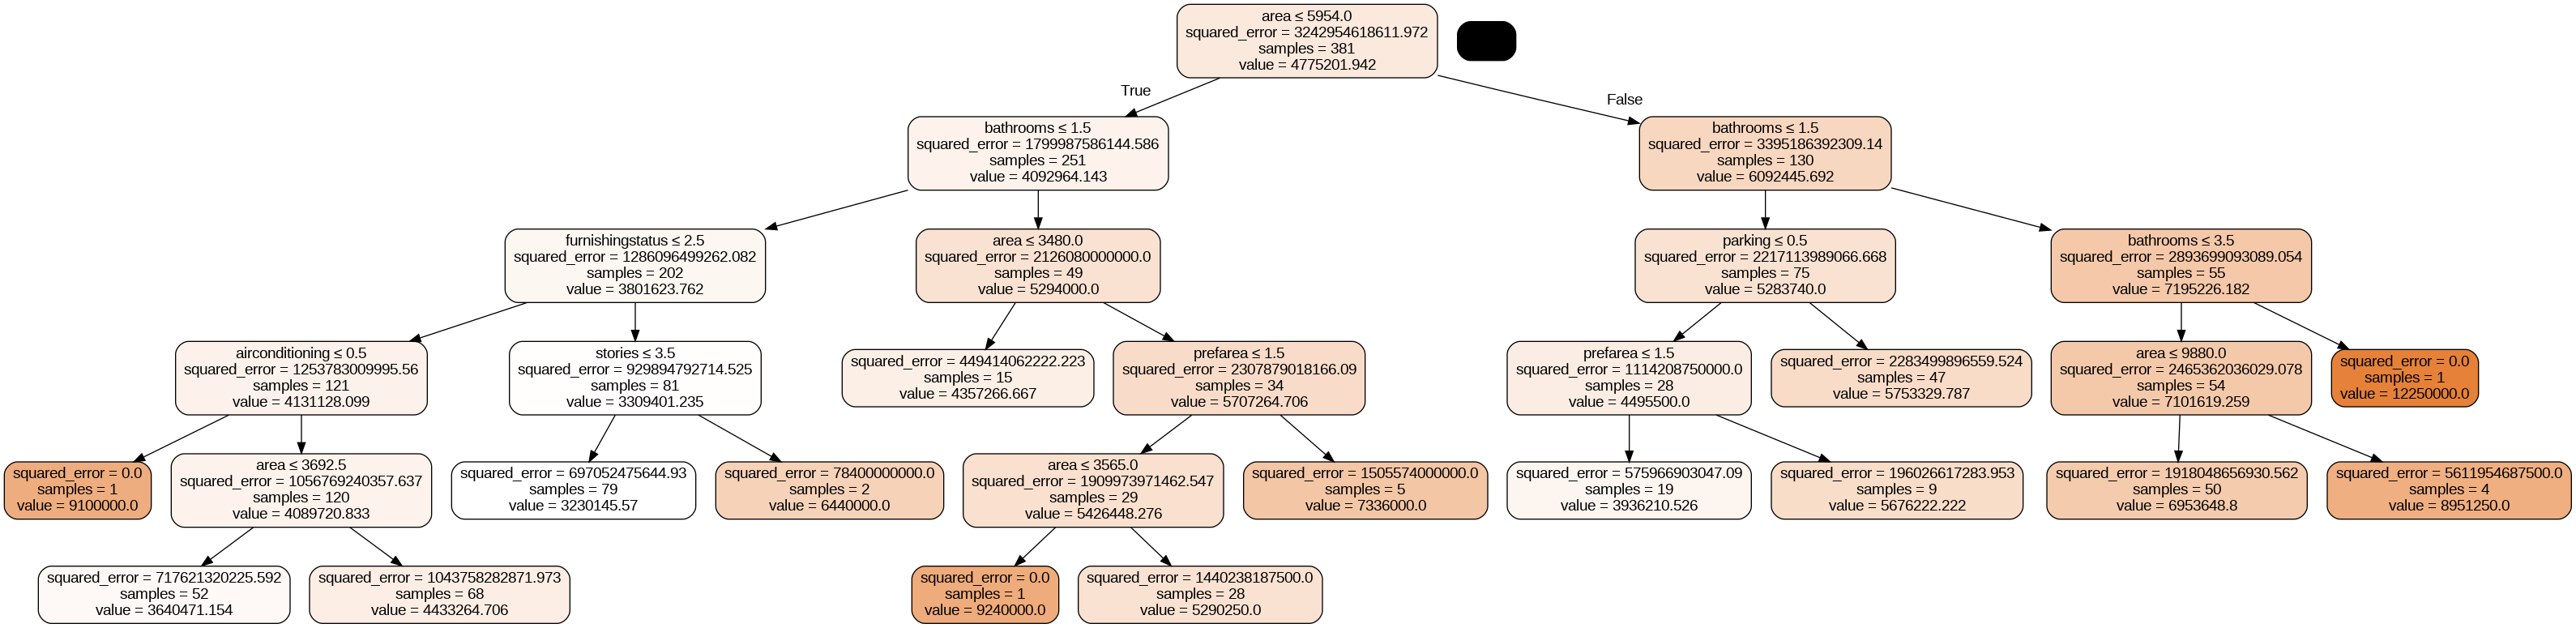

In [ ]:
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, 
filled=True, rounded=True,
special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('HousePricePrediction.png')
Image(graph.create_png())


# **Congratulations**
You now can try another dataset on your own: https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption